In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
# Load the CSV
df = pd.read_csv("../data/2025-depthgrid/Depth_grid.csv")

# Get Columns
x = df["X"]
y = df["Y"]
z = df["Depth"]

In [3]:
# Load in sulpher cave DEM
df_dem = pd.read_csv("../data/2025-depthgrid/sulfur_cave_DEM_GPS_20220526.csv")

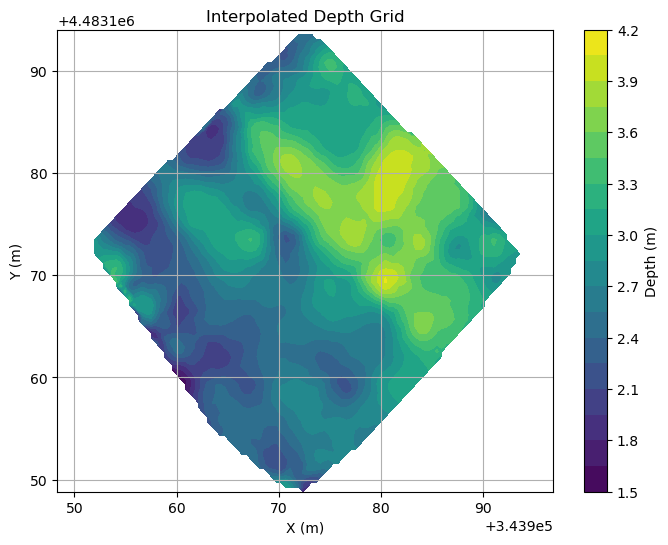

In [4]:
# Create a grid for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(xi, yi, zi, levels=20, cmap="viridis")
cbar = plt.colorbar(contour)
cbar.set_label("Depth (m)")

# Labels and formatting
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Interpolated Depth Grid")
plt.axis('equal')
plt.grid(True)
plt.show()

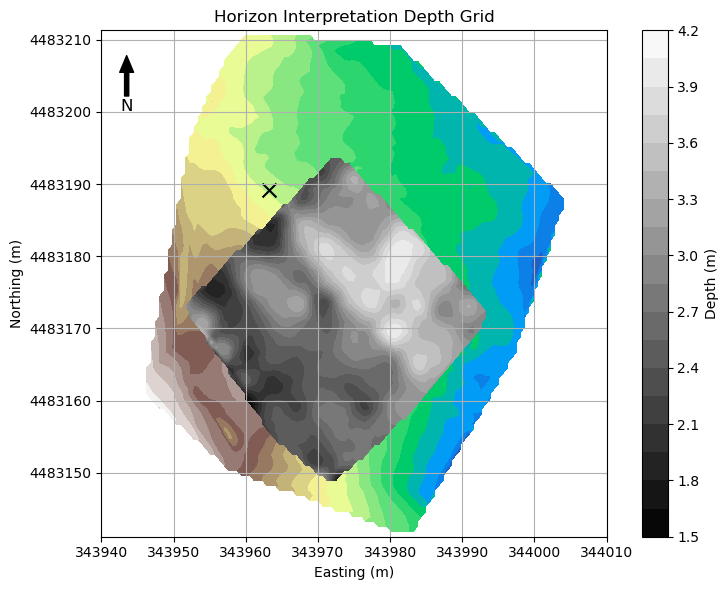

In [5]:
# Interpolate Elevation
xi = np.linspace(df_dem["Easting"].min(), df_dem["Easting"].max(), 100)
yi = np.linspace(df_dem["Northing"].min(), df_dem["Northing"].max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi_elev = griddata(
    (df_dem["Easting"], df_dem["Northing"]),
    df_dem["Elevation"],
    (xi, yi),
    method='cubic'
)

# Interpolate Depth
zi_depth = griddata(
    (x, y), z, (xi, yi), method='cubic'
)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Elevation background
ax.contourf(xi, yi, zi_elev, levels=20, cmap='terrain')

# Depth overlay with colorbar
depth_plot = ax.contourf(xi, yi, zi_depth, levels=20, cmap='gray')
cbar = fig.colorbar(depth_plot, ax=ax)
cbar.set_label("Depth (m)")

# Labels and formatting
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_title("Horizon Interpretation Depth Grid")
ax.set_aspect('equal')
ax.grid(True)

# Format axis ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0f}"))
ax.set_xlim(343940, 344010)

# Add North Arrow
plt.annotate(
    'N',
    xy=(0.05, 0.95),  # arrow tip (in axes fraction)
    xytext=(0.05, 0.85),  # arrow base
    arrowprops=dict(facecolor='black', width=3, headwidth=10),
    ha='center', va='center',
    fontsize=12,
    xycoords='axes fraction'
)

# Cave entrance
plt.scatter(343963.25, 4483189.21, marker="x", color="k", s=100)

plt.tight_layout()

plt.savefig("../figures/2025_DepthGrid")
plt.show()

In [18]:
# get 2024 slice data
df = pd.read_csv("../data/2025-depthgrid/Slice 1 - 5.11 m.csv")

# Get X, Y, Amplitude
x = df["X"]
y = df["Y"]
z = df["Amplitude"]

# Interpolate amplitude data onto the grid
zi_amp = griddata((x, y), z, (xi, yi), method='cubic')

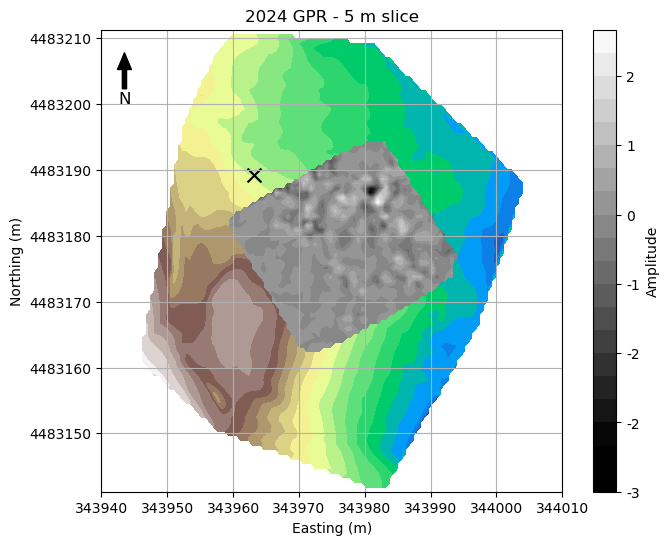

In [21]:
# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Elevation background
ax.contourf(xi, yi, zi_elev, levels=20, cmap='terrain')

# Overlay amplitude data
# amp_plot = ax.contourf(xi, yi, zi_amp, levels=20, cmap='grey')
amp_plot = ax.contourf(xi, yi, zi_amp, levels=20, cmap='gray', vmin=-2.5)

# Add colorbar for amplitude
cbar = plt.colorbar(amp_plot, ax=ax, label="Amplitude")
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0f}"))
# Labels and formatting
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_title("2024 GPR - 5 m slice")
ax.set_aspect('equal')
ax.grid(True)

# Format axis ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0f}"))
ax.set_xlim(343940, 344010)

# Add North Arrow
plt.annotate(
    'N',
    xy=(0.05, 0.95),  # arrow tip (in axes fraction)
    xytext=(0.05, 0.85),  # arrow base
    arrowprops=dict(facecolor='black', width=3, headwidth=10),
    ha='center', va='center',
    fontsize=12,
    xycoords='axes fraction'
)

# Cave entrance
plt.scatter(343963.25, 4483189.21, marker="x", color="k", s=100)
plt.savefig("../figures/2024_5m")
plt.show()